In [894]:
import pickle
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math

### Load data

In [895]:
origin_dir = "/home/junwang/huichen/maddpg_orig/learning_curves/simple_push/"
my_dir = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_push/"
my_good_i3_dir = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_push/good_i3/"
my_adv_i3_dir =  "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_push/adv_i3/"

orgin_files = glob.glob(origin_dir + "*_agrewards.pkl")
my_files =  glob.glob(my_dir + "*_agrewards.pkl")
my_good_i3_files = glob.glob(my_good_i3_dir + "*_agrewards.pkl")
my_adv_i3_files = glob.glob(my_adv_i3_dir + "*_agrewards.pkl")

orgin_data_list = []
for file in orgin_files:
    with open(file, 'rb') as f:
        origin_data = pickle.load(f)
        orgin_data_list.append(origin_data)
my_data_list =[]
for file in my_files:
    with open(file, 'rb') as f:
        my_data_list.append(pickle.load(f))

my_adv_i3_list = []
for file in my_adv_i3_files:
    with open(file, 'rb') as f:
        my_adv_i3_list.append(pickle.load(f)) 
my_good_i3_list = []
for file in my_good_i3_files:
    with open(file, 'rb') as f:
        my_good_i3_list.append(pickle.load(f)) 
        
origin_good = []
origin_adv = []
for i in range(len(orgin_data_list)):
    origin_good.append([rew for i, rew in enumerate(orgin_data_list[i]) if i % 2 ==0])
    origin_adv.append([rew for i, rew in enumerate(orgin_data_list[i]) if i % 2 !=0])
my_good = []
my_adv = []
for i in range(len(my_data_list)):
    my_good.append([rew for i, rew in enumerate(my_data_list[i]) if i % 2 ==0])
    my_adv.append([rew for i, rew in enumerate(my_data_list[i]) if i % 2 !=0])
my_adv_i3_good = []       
my_adv_i3_adv = []
for i in range(len(my_adv_i3_list)):
    my_adv_i3_good.append([rew for i, rew in enumerate(my_adv_i3_list[i]) if i % 2 ==0])
    my_adv_i3_adv.append([rew for i, rew in enumerate(my_adv_i3_list[i]) if i % 2 !=0])
my_good_i3_good = []       
my_good_i3_adv = []
for i in range(len(my_good_i3_list)):
    my_good_i3_good.append([rew for i, rew in enumerate(my_good_i3_list[i]) if i % 2 ==0])
    my_good_i3_adv.append([rew for i, rew in enumerate(my_good_i3_list[i]) if i % 2 !=0])  

origin_total_reward = []
for i in range(len(orgin_data_list)):
    origin_total_reward.append([r1+ r2 for r1, r2 in zip(origin_good[i], origin_adv[i])])
my_total_reward = []    
for i in range(len(my_data_list)):    
    my_total_reward.append([r1+ r2 for r1, r2 in zip(my_good[i], my_adv[i])])
my_adv_i3_total_reward = []    
for i in range(len(my_adv_i3_list)):    
    my_adv_i3_total_reward.append([r1+ r2 for r1, r2 in zip(my_adv_i3_good[i], my_adv_i3_adv[i])])
my_good_i3_total_reward = []    
for i in range(len(my_good_i3_list)):    
    my_good_i3_total_reward.append([r1+ r2 for r1, r2 in zip(my_good_i3_good[i], my_good_i3_adv[i])])

    

### plot 

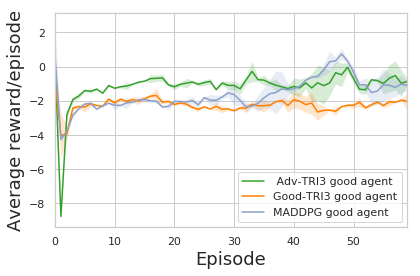

In [896]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_good, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_good, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_good, color = '#ff7f00')
d = sns.tsplot(data = origin_good,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b,c,d], handles=h, labels=[" Adv-TRI3 good agent", 'Good-TRI3 good agent', "MADDPG good agent"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('push_good_i3.pdf', format='pdf', bbox_inches='tight') 
# Good i3 good agent scores highest                   

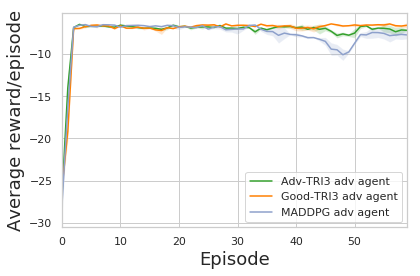

In [897]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_adv, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_adv, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_adv, color = '#ff7f00')
d = sns.tsplot(data = origin_adv,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b, c,d], handles=h, labels=['Adv-TRI3 adv agent','Good-TRI3 adv agent', "MADDPG adv agent"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('push_adv_i3.pdf', format='pdf', bbox_inches='tight') 

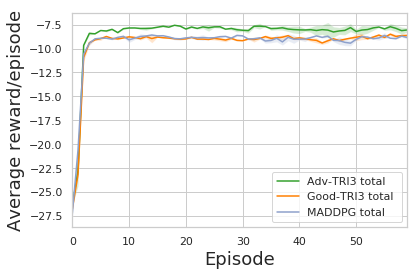

In [898]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_total_reward, color = '#ff7f 00')
b = sns.tsplot(data = my_adv_i3_total_reward, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_total_reward, color = '#ff7f00')
d = sns.tsplot(data = origin_total_reward,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b, c,d], handles=h, labels=[ 'Adv-TRI3 total','Good-TRI3 total ', "MADDPG total"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('push_total.pdf', format='pdf', bbox_inches='tight') 
#MADDPG scores lowest 

# Simple_adv

In [899]:
origin_dir = "/home/junwang/huichen/maddpg_orig/learning_curves/simple_adv/"
my_dir = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_adv/"
my_adv_i3_dir = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_adv/adv_i3/"
my_good_i3_dir = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_adv/good_i3/"

orgin_files = glob.glob(origin_dir + "*_agrewards.pkl")
my_files =  glob.glob(my_dir + "*_agrewards.pkl")
my_adv_i3_files = glob.glob(my_adv_i3_dir + "*_agrewards.pkl")
my_good_i3_files = glob.glob(my_good_i3_dir + "*_agrewards.pkl")

orgin_data_list = []
for file in orgin_files:
    with open(file, 'rb') as f:
        orgin_data_list.append(pickle.load(f))
        
my_data_list =[]
for file in my_files:
    with open(file, 'rb') as f:
        my_data_list.append(pickle.load(f)) 

my_adv_i3_list = []
for file in my_adv_i3_files:
    with open(file, 'rb') as f:
        my_adv_i3_list.append(pickle.load(f)) 
my_good_i3_list = []
for file in my_good_i3_files:
    with open(file, 'rb') as f:
        my_good_i3_list.append(pickle.load(f))

        
origin_good = []
origin_adv = []
for i in range(len(orgin_data_list)):
    origin_adv.append([rew for i, rew in enumerate(orgin_data_list[i]) if (i+3) % 3 ==0])
    origin_good.append([rew for i, rew in enumerate(orgin_data_list[i]) if (i+3) % 3 ==1])   
        
my_good = []
my_adv = []
for i in range(len(my_data_list)):
    my_adv.append([rew for i, rew in enumerate(my_data_list[i]) if (i+3) % 3 == 0])
    my_good.append([rew for i, rew in enumerate(my_data_list[i]) if (i+3) % 3 == 1])

my_adv_i3_adv = []
my_adv_i3_good = []
for i in range(len(my_adv_i3_list)):
    my_adv_i3_adv.append([rew for i, rew in enumerate(my_adv_i3_list[i]) if (i+3) % 3 == 0])
    my_adv_i3_good.append([rew for i, rew in enumerate(my_adv_i3_list[i]) if (i+3) % 3 == 1])

my_good_i3_adv = []
my_good_i3_good = []
for i in range(len(my_good_i3_list)):
    my_good_i3_adv.append([rew for i, rew in enumerate(my_good_i3_list[i]) if (i+3) % 3 == 0])
    my_good_i3_good.append([rew for i, rew in enumerate(my_good_i3_list[i]) if (i+3) % 3 == 1])

    
origin_total_reward = []
for i in range(len(orgin_data_list)):
    origin_total_reward.append([r1*3 + r2 for r1, r2 in zip(origin_good[i], origin_adv[i])])
my_total_reward = []    
for i in range(len(my_data_list)):    
    my_total_reward.append([r1*3 + r2 for r1, r2 in zip(my_good[i], my_adv[i])])
my_adv_i3_total_reward = []    
for i in range(len(my_adv_i3_list)):    
    my_adv_i3_total_reward.append([r1*3 + r2 for r1, r2 in zip(my_adv_i3_good[i], my_adv_i3_adv[i])])
my_good_i3_total_reward = []    
for i in range(len(my_good_i3_list)):    
    my_good_i3_total_reward.append([r1*3 + r2 for r1, r2 in zip(my_good_i3_good[i], my_good_i3_adv[i])])
                                

In [900]:
my_adv_ddpg_good = []
my_adv_ddpg_adv = []
for k in range(len(my_adv_ddpg_list)):
    my_adv_ddpg_good.append([rew for i, rew in enumerate(my_adv_ddpg_list[k]) if (i+3) % 3 == 0])
    my_adv_ddpg_adv.append([rew for i, rew in enumerate(my_adv_ddpg_list[k]) if (i+3) % 3 == 1])
    
my_adv_ddpg_total_reward = []
for i in range(len(my_adv_ddpg_good)):
    my_adv_ddpg_total_reward.append([r1*3 + r2 for r1, r2 in zip(my_adv_ddpg_good[i], my_adv_ddpg_adv[i])])

### Plot

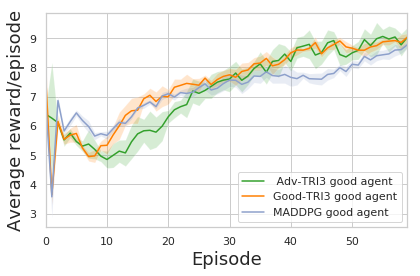

In [901]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_good, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_good, color =sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_good, color = '#ff7f00')
d = sns.tsplot(data = origin_good,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([ b,c,d], handles=h, labels=[" Adv-TRI3 good agent", 'Good-TRI3 good agent', "MADDPG good agent"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('adv_good_i3.pdf', format='pdf', bbox_inches='tight') 
# Good i3 good agent scores highest                   

In [902]:
# my_adv = [a[5:] for a in my_adv]
# my_adv_i3_adv  = [a[5:] for a in my_adv_i3_adv]
# my_good_i3_adv = [a[5:] for a in my_good_i3_adv]
# origin_adv = [a[5:] for a in origin_adv]

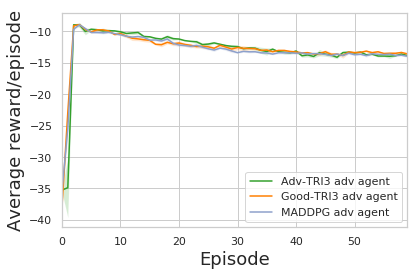

In [903]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_adv, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_adv, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_adv, color = '#ff7f00')
d = sns.tsplot(data = origin_adv,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([ b, c,d], handles=h, labels=['Adv-TRI3 adv agent','Good-TRI3 adv agent', "MADDPG adv agent"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('adv_good_i3_adv.pdf', format='pdf', bbox_inches='tight') 

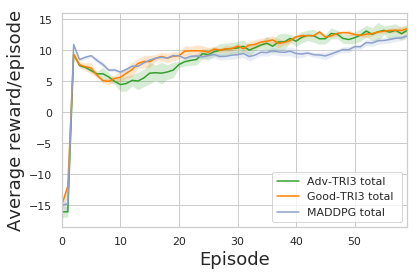

In [904]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_total_reward, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_total_reward, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_total_reward, color = '#ff7f00')
d = sns.tsplot(data = origin_total_reward,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b, c,d], handles=h, labels=['Adv-TRI3 total','Good-TRI3 total ', "MADDPG total"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('adv_good_i3_total.pdf', format='pdf', bbox_inches='tight') 
#MADDPG scores lowest 

### All DDPG 

# Accurancy

# Tag


In [905]:
origin_dir = "/home/junwang/huichen/maddpg_orig/learning_curves/simple_tag/"
my_dir =  "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_tag/"
my_adv_i3 = "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_tag/adv_i3/"
my_good_i3 =  "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_tag/good_i3/"

orgin_files = glob.glob(origin_dir + "*_agrewards.pkl")
my_files =  glob.glob(my_dir + "*_agrewards.pkl")
my_adv_i3_files = glob.glob(my_adv_i3 +  "*_agrewards.pkl")
my_good_i3_files = glob.glob(my_good_i3 +  "*_agrewards.pkl")
                      
                             
#LOAD data                             
orgin_data_list = []
for file in orgin_files:
    with open(file, 'rb') as f:
        orgin_data_list.append(pickle.load(f))
my_data_list =[]
for file in my_files:
    with open(file, 'rb') as f:
        my_data_list.append(pickle.load(f)) 
my_adv_i3_data_list = []
for file in my_adv_i3_files:
    with open(file, 'rb') as f:
        my_adv_i3_data_list.append(pickle.load(f))    
my_good_i3_data_list = []
for file in my_good_i3_files:
    with open(file, 'rb') as f:
        my_good_i3_data_list.append(pickle.load(f))                              
                             
# separate data                             
origin_good = []
origin_adv = []
for i in range(len(orgin_data_list)):
    origin_adv.append([rew for i, rew in enumerate(orgin_data_list[i]) if (i+4) % 4 ==0])
    origin_good.append([rew for i, rew in enumerate(orgin_data_list[i]) if (i+4) % 4 ==3])   
        
my_good = []
my_adv = []
for i in range(len(my_data_list)):
    my_adv.append([rew for i, rew in enumerate(my_data_list[i]) if (i+4) % 4 == 0])
    my_good.append([rew for i, rew in enumerate(my_data_list[i]) if (i+4) % 4 == 3])

my_adv_i3_good = []
my_adv_i3_adv = []
for i in range(len(my_adv_i3_data_list)):
    my_adv_i3_adv.append([rew for i, rew in enumerate(my_adv_i3_data_list[i]) if (i+4) % 4 == 0])
    my_adv_i3_good.append([rew for i, rew in enumerate(my_adv_i3_data_list[i]) if (i+4) % 4 == 3])
    
my_good_i3_good = []
my_good_i3_adv = []
for i in range(len(my_good_i3_data_list)):
    my_good_i3_adv.append([rew for i, rew in enumerate(my_good_i3_data_list[i]) if (i+4) % 4 == 0])
    my_good_i3_good.append([rew for i, rew in enumerate(my_good_i3_data_list[i]) if (i+4) % 4 == 3])
          
                             
#calculate total reward                             
origin_total_reward = []
for i in range(len(orgin_data_list)):
    origin_total_reward.append([r1 + r2*3 for r1, r2 in zip(origin_good[i], origin_adv[i])])
my_total_reward = []    
for i in range(len(my_data_list)):    
    my_total_reward.append([r1 + r2*3 for r1, r2 in zip(my_good[i], my_adv[i])])
my_adv_i3_total_reward = []    
for i in range(len(my_adv_i3_data_list)):    
    my_adv_i3_total_reward.append([r1 + r2*3 for r1, r2 in zip(my_adv_i3_good[i], my_adv_i3_adv[i])])    
my_good_i3_total_reward = []    
for i in range(len(my_good_i3_data_list)):    
    my_good_i3_total_reward.append([r1 + r2*3 for r1, r2 in zip(my_good_i3_good[i], my_good_i3_adv[i])])       

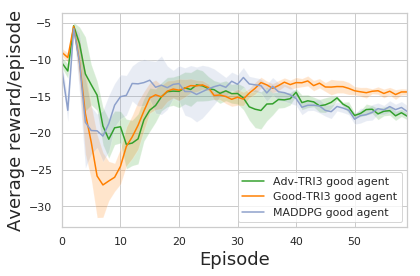

In [906]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_good[:][:60], color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_good, color =   sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_good, color = '#ff7f00')
d = sns.tsplot(data = origin_good,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b,c,d], handles=h, labels=["Adv-TRI3 good agent", 'Good-TRI3 good agent', "MADDPG good agent"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('tag_good.pdf', format='pdf', bbox_inches='tight') 
                  

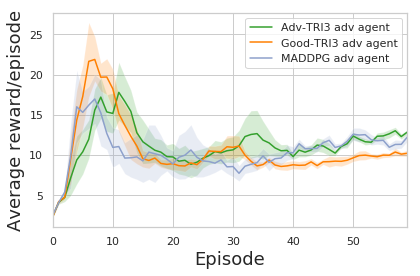

In [907]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_adv[:][:60], color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_adv, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_adv,  color = '#ff7f00')
d = sns.tsplot(data = origin_adv,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([a, b,c,d], handles=h, labels=["Adv-TRI3 adv agent", 'Good-TRI3 adv agent', "MADDPG adv agent"], loc=1, frameon=True)


plt.tight_layout()
plt.savefig('tag_adv.pdf', format='pdf', bbox_inches='tight') 

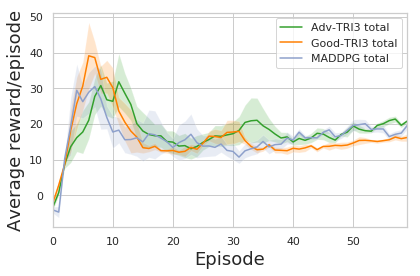

In [908]:
sns.set(style="whitegrid")
# a = sns.tsplot(data = my_total_reward, color = '#ff7f00')
b = sns.tsplot(data = my_adv_i3_total_reward, color = sns.color_palette("Paired")[3])
c = sns.tsplot(data = my_good_i3_total_reward, color = '#ff7f00')
d = sns.tsplot(data = origin_total_reward,  color = sns.color_palette("Set2")[2])

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b,c,d], handles=h, labels=["Adv-TRI3 total", 'Good-TRI3 total', "MADDPG total"], loc=1, frameon=True)


plt.tight_layout()
plt.savefig('tag_total.pdf', format='pdf', bbox_inches='tight') 
# all I3 scores highest 

# Simple Spread

In [909]:
origin_dir = "/home/junwang/huichen/maddpg_orig/learning_curves/simple_spread/"
my_dir =  "/home/junwang/huichen/my_trpo_maddpg/learning_curves/simple_spread/"

orgin_files = glob.glob(origin_dir + "*_rewards.pkl")
my_files =  glob.glob(my_dir + "*_rewards.pkl")
                             
#LOAD data                             
orgin_data_list = []
for file in orgin_files:
    with open(file, 'rb') as f:
        orgin_data_list.append(pickle.load(f))
my_data_list =[]
for file in my_files:
    with open(file, 'rb') as f:
        my_data_list.append(pickle.load(f)) 
                       


In [910]:
orgin_data_list = [a[5:] for a in orgin_data_list]
my_data_list = [a[5:] for a  in my_data_list]

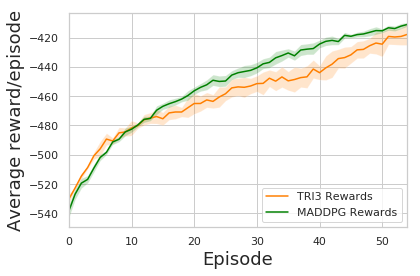

In [911]:
sns.set(style="whitegrid")
a = sns.tsplot(data = orgin_data_list, color = '#ff7f00')
b = sns.tsplot(data = my_data_list,  color = 'green')

plt.ylabel('Average reward/episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
h = plt.gca().get_lines()
legent = plt.legend([b, a], handles=h, labels=["TRI3 Rewards",  "MADDPG Rewards"], loc=4, frameon=True)


plt.tight_layout()
plt.savefig('spread.pdf', format='pdf', bbox_inches='tight') 